In [1]:
#importing required libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.metrics import mean_squared_log_error
from math import sqrt
from statistics import mean, stdev

import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading the data
data = pd.read_csv("/Users/paramanandbhat/Downloads/Final_Project/data/Train_KQyJ5eh.csv")


In [3]:
data.shape

(587, 2)

In [4]:
data.head()


,Date,Number_SKU_Sold
0,1-Jan-07,31762
1,2-Jan-07,285955
2,3-Jan-07,740781
3,4-Jan-07,508796
4,5-Jan-07,445951


In [5]:
data.tail()

,Date,Number_SKU_Sold
582,20-Dec-08,10572461
583,21-Dec-08,11507413
584,22-Dec-08,13640882
585,23-Dec-08,8821786
586,24-Dec-08,192532706


In [6]:
'''- We have daily sales data for two years, starting from 1-jan-07 to 24-dec-08.
- Using this historical data, we need to forecast the demand expected in the next 6 months. 

Let us do some basic exploration and find out if the given data has any trend or seasonal patterns.'''

'- We have daily sales data for two years, starting from 1-jan-07 to 24-dec-08.\n- Using this historical data, we need to forecast the demand expected in the next 6 months. \n\nLet us do some basic exploration and find out if the given data has any trend or seasonal patterns.'

In [7]:
# 3. Preprocessing the Data


In [8]:
### Plotting Time Series

In [9]:
data['Date'] = pd.to_datetime(data['Date'], format='%d-%b-%y')
data.index = data['Date']

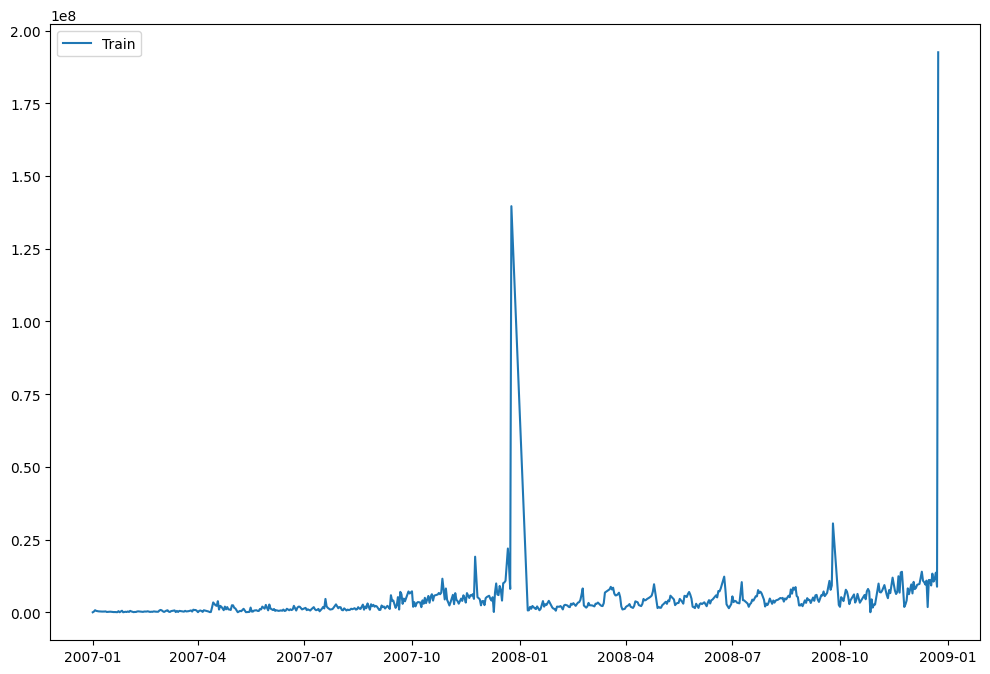

In [10]:
plt.figure(figsize=(12,8))

plt.plot(data.index, data['Number_SKU_Sold'], label='Train')
plt.legend(loc='best')
plt.show()

In [11]:
'''- Clearly there are some very high values in the data. 
- Could this be around holiday season like new year's? Let us find out'''

"- Clearly there are some very high values in the data. \n- Could this be around holiday season like new year's? Let us find out"

In [12]:
### Outliers in Data

In [13]:
data['Number_SKU_Sold'].describe()

count    5.870000e+02
mean     4.118112e+06
std      1.015100e+07
min      3.176200e+04
25%      1.075948e+06
50%      2.784444e+06
75%      5.208588e+06
max      1.925327e+08
Name: Number_SKU_Sold, dtype: float64

In [14]:
print('Value at 95th percentile:', (np.percentile(data['Number_SKU_Sold'], 95)))
print('Value at 97th percentile:', (np.percentile(data['Number_SKU_Sold'], 97)))
print('Value at 99th percentile:', (np.percentile(data['Number_SKU_Sold'], 99)))

Value at 95th percentile: 9855528.099999992
Value at 97th percentile: 10975127.499999993
Value at 99th percentile: 14225472.619999975


<Axes: ylabel='Number_SKU_Sold'>

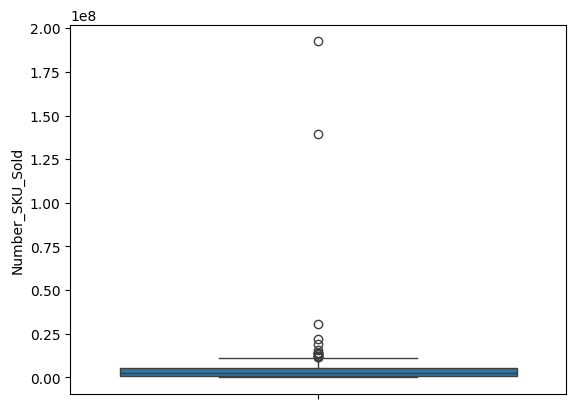

In [15]:
sns.boxplot(data['Number_SKU_Sold'])

In [16]:
IQR = (np.percentile(data['Number_SKU_Sold'], 75)) - (np.percentile(data['Number_SKU_Sold'], 25))
whisker_val = (np.percentile(data['Number_SKU_Sold'], 75)) + (1.5*(IQR))
whisker_val

11407547.25

In [17]:
# number of values greater than whisker value
data.loc[data['Number_SKU_Sold']>whisker_val].shape

(16, 2)

In [18]:
'''- We can use either the 95th percentile value or whisker value to select outliers
- There are 16 points greater than whisker value
- Replace the outliers with bfill or ffill'''

'- We can use either the 95th percentile value or whisker value to select outliers\n- There are 16 points greater than whisker value\n- Replace the outliers with bfill or ffill'

In [19]:
data.loc[data['Number_SKU_Sold']>whisker_val]

,Date,Number_SKU_Sold
Date,,
2007-10-27,2007-10-27,11572492
2007-11-24,2007-11-24,19138073
2007-12-22,2007-12-22,21956074
2007-12-23,2007-12-23,15766750
2007-12-25,2007-12-25,139629635
2008-06-24,2008-06-24,12288917
2008-09-25,2008-09-25,30579435
2008-11-15,2008-11-15,11930320
2008-11-20,2008-11-20,12416871


In [20]:
data_original = data['Number_SKU_Sold'] 

In [21]:
data['Number_SKU_Sold'] = data['Number_SKU_Sold'].apply(lambda x: np.nan if x > whisker_val else x)

In [22]:
data['Number_SKU_Sold'].isnull().sum()

16

In [23]:
# removing outliers using ffill
data['Number_SKU_Sold'] = data['Number_SKU_Sold'].fillna(method ='ffill')

In [24]:
data['Number_SKU_Sold'].isnull().sum()

0

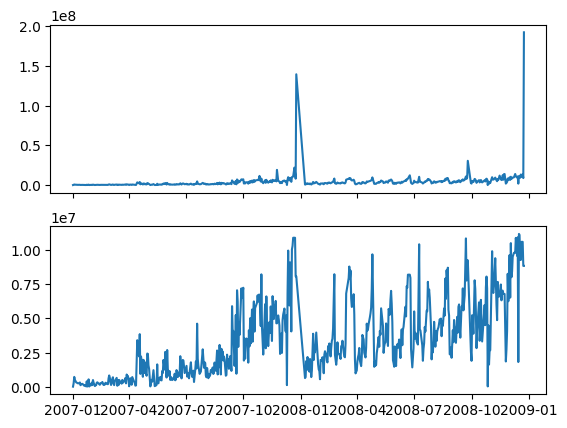

In [25]:
fig, axs = plt.subplots(2, 1,  sharex=True)

axs[0].plot(data_original,) 
axs[1].plot(data['Number_SKU_Sold'])
  
plt.show() 

In [26]:
### Missing Date Values in Data

In [27]:
data['Date'].min(), data['Date'].max()

(Timestamp('2007-01-01 00:00:00'), Timestamp('2008-12-24 00:00:00'))

In [28]:
print('Total days between 01-jan-07 to 24-Dec-08:', (data['Date'].max() - data['Date'].min()).days)
print('Number of rows present in the data are:', data.shape[0])

Total days between 01-jan-07 to 24-Dec-08: 723
Number of rows present in the data are: 587


In [29]:
724/7

103.42857142857143

In [30]:
pd.date_range(start = '2007-01-01', end = '2008-12-24' ).difference(data.index)

DatetimeIndex(['2007-01-07', '2007-01-08', '2007-01-10', '2007-01-14',
               '2007-01-17', '2007-01-21', '2007-01-25', '2007-01-28',
               '2007-02-04', '2007-02-10',
               ...
               '2008-11-01', '2008-11-02', '2008-11-07', '2008-11-09',
               '2008-11-14', '2008-11-16', '2008-11-24', '2008-11-30',
               '2008-12-07', '2008-12-09'],
              dtype='datetime64[ns]', length=137, freq=None)

In [31]:
'''
- There are 137 days missing over the span of two years. 
- Are these weekends? Or Holidays? 
- Are these days missing at random?

Let's find out

'''

"\n- There are 137 days missing over the span of two years. \n- Are these weekends? Or Holidays? \n- Are these days missing at random?\n\nLet's find out\n\n"

In [32]:
start_date = '2007-01-01'
end_date = '2008-12-24'

In [33]:
missing_dates = pd.DataFrame(data = pd.date_range(start = start_date, end = end_date).difference(data.index), 
                             columns= ['Date'])

In [34]:
missing_dates['Day'] = missing_dates['Date'].dt.strftime("%A")
missing_dates['Month'] = missing_dates['Date'].dt.month
missing_dates['year'] = missing_dates['Date'].dt.year

In [35]:
missing_dates.head(5)

,Date,Day,Month,year
0,2007-01-07,Sunday,1,2007
1,2007-01-08,Monday,1,2007
2,2007-01-10,Wednesday,1,2007
3,2007-01-14,Sunday,1,2007
4,2007-01-17,Wednesday,1,2007


In [36]:
missing_dates['Day'].value_counts()

Day
Sunday       86
Saturday     14
Monday       10
Friday       10
Wednesday     6
Thursday      6
Tuesday       5
Name: count, dtype: int64

In [37]:
missing_dates['Month'].value_counts()

Month
1     19
6     13
7     13
9     13
3     12
11    12
5     10
10    10
12    10
2      9
4      9
8      7
Name: count, dtype: int64

In [38]:
pd.crosstab(missing_dates['year'], missing_dates['Day'])

Day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
year,,,,,,,
2007,3,4,6,43,5,1,5
2008,7,6,8,43,1,4,1


In [39]:
'''
- Most of the missing days are Sundays
- Remaining 51 missing days are from Mon-Fri
- January has seen most of the missing days
'''

'\n- Most of the missing days are Sundays\n- Remaining 51 missing days are from Mon-Fri\n- January has seen most of the missing days\n'

In [40]:
'''Conclusions:
1. We will not make predictions for Sunday
2. We will make predictions for all weekdays
3. Discuss with stakeholders for manual adjustments on Sunday and holiday'''

'Conclusions:\n1. We will not make predictions for Sunday\n2. We will make predictions for all weekdays\n3. Discuss with stakeholders for manual adjustments on Sunday and holiday'

In [41]:
### Dealing with Missing Values

In [42]:
# add rows for missing days
data_ = pd.DataFrame(data['Number_SKU_Sold'])
data_.index = pd.DatetimeIndex(data.Date)

In [43]:
data_.head(10)

,Number_SKU_Sold
Date,
2007-01-01,31762.0
2007-01-02,285955.0
2007-01-03,740781.0
2007-01-04,508796.0
2007-01-05,445951.0
2007-01-06,347351.0
2007-01-09,269415.0
2007-01-11,286603.0
2007-01-12,334356.0


In [44]:
data_.head(9)

,Number_SKU_Sold
Date,
2007-01-01,31762.0
2007-01-02,285955.0
2007-01-03,740781.0
2007-01-04,508796.0
2007-01-05,445951.0
2007-01-06,347351.0
2007-01-09,269415.0
2007-01-11,286603.0
2007-01-12,334356.0


In [45]:
# extract weekday from the dates
data_['Date'] = data_.index
data_['weekday_name'] = data_['Date'].dt.strftime("%A")
data_.shape

(587, 3)

In [46]:
data_.head()

,Number_SKU_Sold,Date,weekday_name
Date,,,
2007-01-01,31762.0,2007-01-01,Monday
2007-01-02,285955.0,2007-01-02,Tuesday
2007-01-03,740781.0,2007-01-03,Wednesday
2007-01-04,508796.0,2007-01-04,Thursday
2007-01-05,445951.0,2007-01-05,Friday


In [47]:
# remove sundays from data
data_ = data_.loc[data_['weekday_name']!= 'Sunday']
data_.shape

(570, 3)

In [48]:
data_original = data['Number_SKU_Sold']
data_['Number_SKU_Sold'] = data_['Number_SKU_Sold'].apply(lambda x: np.nan if x == 0.0 else x)
data_.isnull().sum()

Number_SKU_Sold    0
Date               0
weekday_name       0
dtype: int64

In [49]:
# impute missing values
data_['Number_SKU_Sold'] = data_['Number_SKU_Sold'].fillna(method ='ffill')

In [50]:
data_.isnull().sum()

Number_SKU_Sold    0
Date               0
weekday_name       0
dtype: int64

In [51]:
# 4. Feature Extraction and Exploration

In [52]:
### Decompose Series

In [53]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposed_series = seasonal_decompose(data_['Number_SKU_Sold'], period=6)

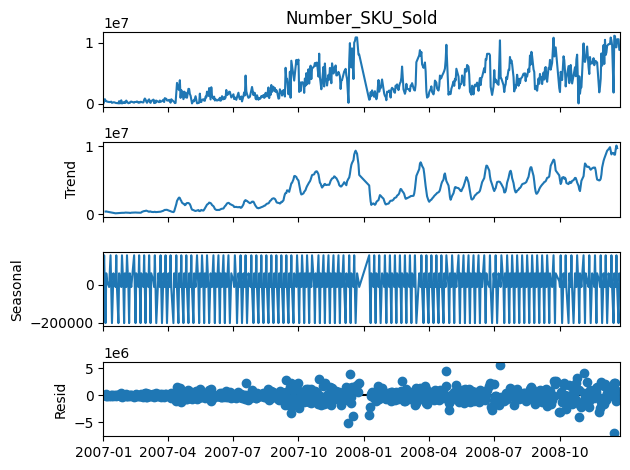

In [54]:
decomposed_series.plot()
plt.show()

<Axes: xlabel='Date'>

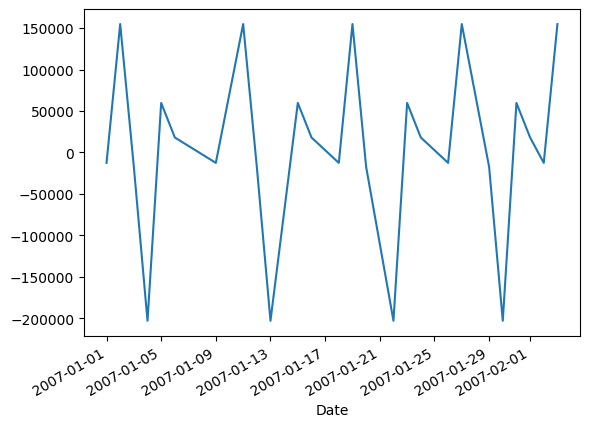

In [55]:
# considering 26 days a month 
decomposed_series.seasonal[0:26].plot()

In [56]:
'''- Pattern repeats 4 times a month
- This suggests weekly seasonality in the data'''

'- Pattern repeats 4 times a month\n- This suggests weekly seasonality in the data'

In [58]:
data_feat = pd.DataFrame({"year": data_['Date'].dt.year,
                          "month": data_['Date'].dt.month,
                          "day": data_['Date'].dt.day,
                          "weekday": data_['Date'].dt.dayofweek,
                          "weekday_name": data_['Date'].dt.strftime("%A"),
                          "dayofyear": data_['Date'].dt.dayofyear,
                          "week": data_['Date'].dt.isocalendar().week,
                          "quarter": data_['Date'].dt.quarter,
                         })


In [59]:
complete_data = pd.concat([data_feat, data_['Number_SKU_Sold']], axis=1)
complete_data.head()

,year,month,day,weekday,weekday_name,dayofyear,week,quarter,Number_SKU_Sold
Date,,,,,,,,,
2007-01-01,2007,1,1,0,Monday,1,1,1,31762.0
2007-01-02,2007,1,2,1,Tuesday,2,1,1,285955.0
2007-01-03,2007,1,3,2,Wednesday,3,1,1,740781.0
2007-01-04,2007,1,4,3,Thursday,4,1,1,508796.0
2007-01-05,2007,1,5,4,Friday,5,1,1,445951.0


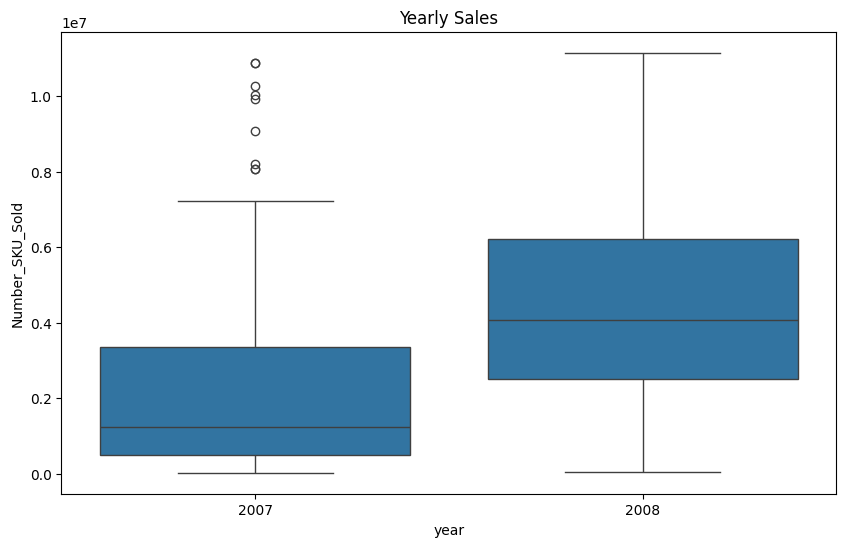

In [60]:
# boxplot for yearly sale
plt.figure(figsize=(10,6))

sns.boxplot(x=complete_data['year'], y=complete_data['Number_SKU_Sold'], )
plt.title('Yearly Sales')
plt.show()

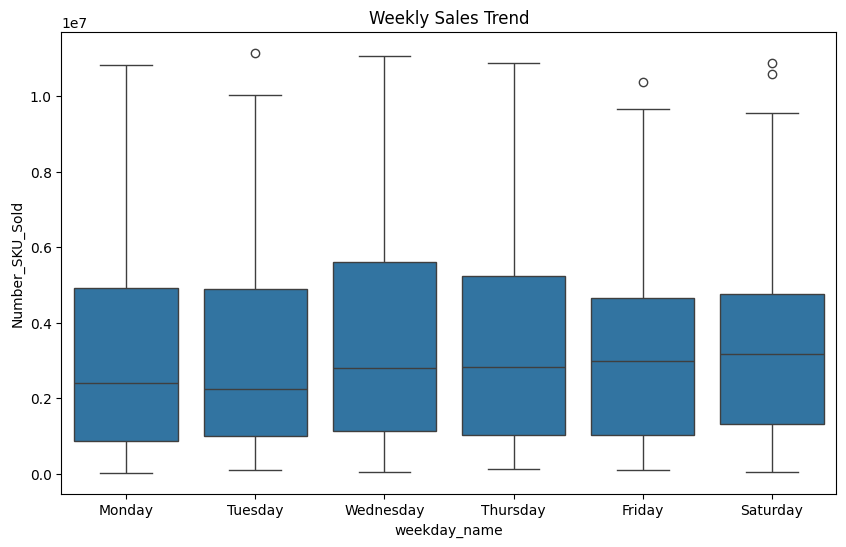

In [62]:
# boxplot for week's sales
plt.figure(figsize=(10,6))

sns.boxplot(x=complete_data['weekday_name'], y=complete_data['Number_SKU_Sold'], )
plt.title('Weekly Sales Trend')
plt.show()

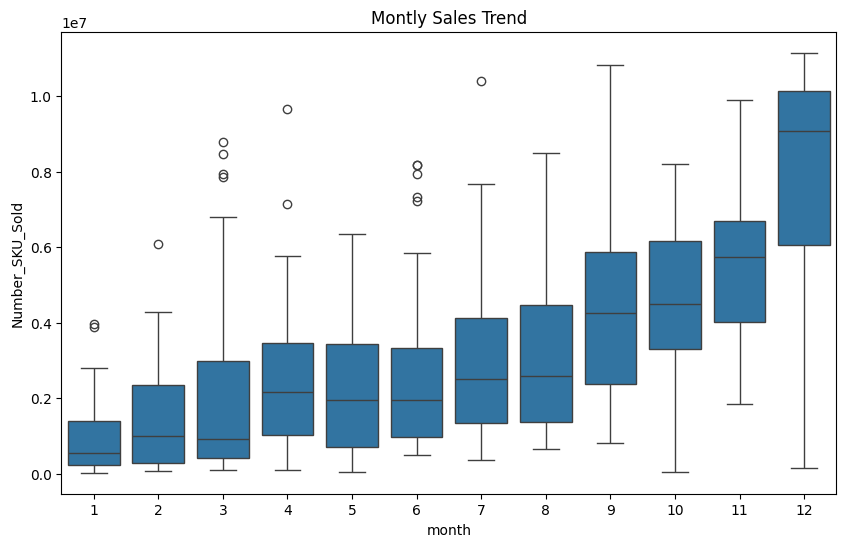

In [63]:
# boxplot for monthly sales
plt.figure(figsize=(10,6))

sns.boxplot(x=complete_data['month'], y=complete_data['Number_SKU_Sold'], )
plt.title('Montly Sales Trend')
plt.show()

In [64]:
'''- Except for a few high sales in 2007, sales were comparatively higher in 2008
- All weekdays have similar trend on sales
- Average sales are higher towards the end of the year'''

'- Except for a few high sales in 2007, sales were comparatively higher in 2008\n- All weekdays have similar trend on sales\n- Average sales are higher towards the end of the year'

In [65]:
# 5. Holdout Validation

In [66]:
data_.head()

,Number_SKU_Sold,Date,weekday_name
Date,,,
2007-01-01,31762.0,2007-01-01,Monday
2007-01-02,285955.0,2007-01-02,Tuesday
2007-01-03,740781.0,2007-01-03,Wednesday
2007-01-04,508796.0,2007-01-04,Thursday
2007-01-05,445951.0,2007-01-05,Friday


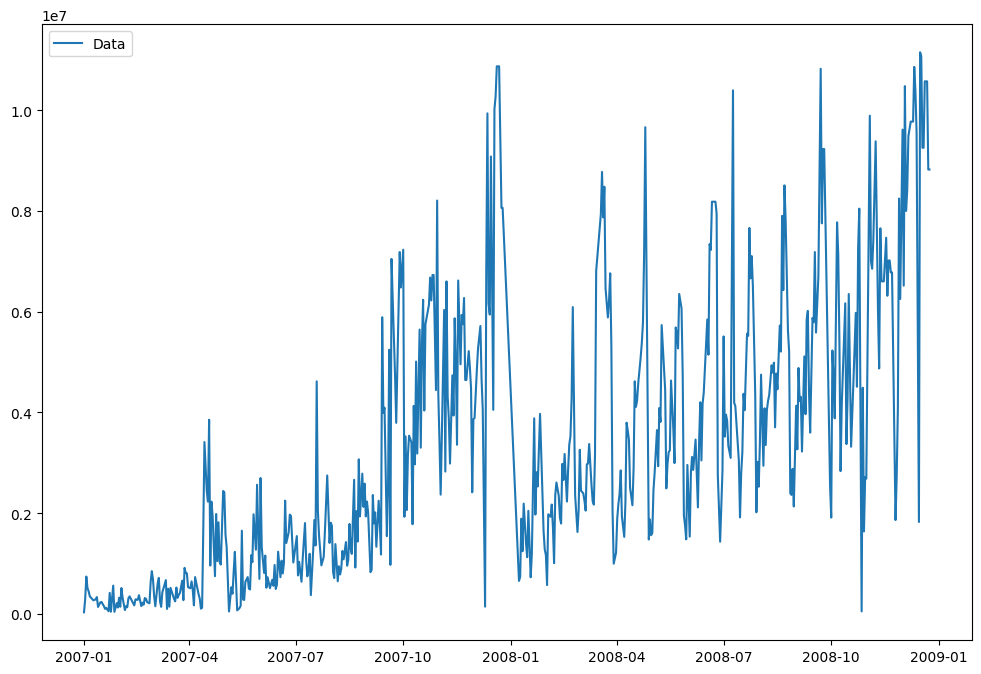

In [67]:
plt.figure(figsize=(12,8))

plt.plot(data_.index, data_['Number_SKU_Sold'], label = 'Data')
plt.legend(loc='best')
plt.show()

In [68]:
# dividing into train and validation sets

train_data = data_[:469]
valid_data = data_[469:]

In [69]:
valid_data.tail()

,Number_SKU_Sold,Date,weekday_name
Date,,,
2008-12-19,9254530.0,2008-12-19,Friday
2008-12-20,10572461.0,2008-12-20,Saturday
2008-12-22,10572461.0,2008-12-22,Monday
2008-12-23,8821786.0,2008-12-23,Tuesday
2008-12-24,8821786.0,2008-12-24,Wednesday


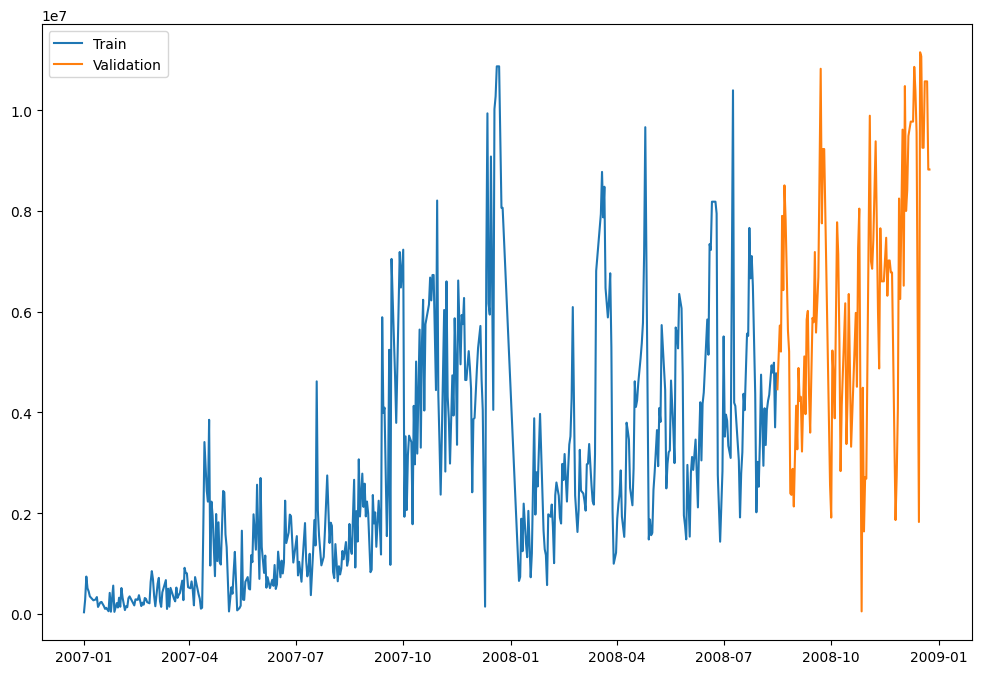

In [70]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['Number_SKU_Sold'], label='Train')
plt.plot(valid_data.index, valid_data['Number_SKU_Sold'], label='Validation')
plt.legend(loc='best')
plt.show()

In [71]:
def rmsle(actual, preds):
    for i in range(0,len(preds)):
        if preds[i]<0:
            preds[i] = 0
        else:
            pass
    
    error = (sqrt(mean_squared_log_error(actual, preds)))*100
    return error

In [72]:
# 6. Time Series Forecasting Models

In [73]:
### Holt's Winters (aka triple enponential smoothing)

In [74]:
#importing module
from statsmodels.tsa.api import ExponentialSmoothing

In [75]:
#training the model
model = ExponentialSmoothing(np.asarray(train_data['Number_SKU_Sold']), seasonal_periods=6, trend='add', seasonal='add')
model = model.fit(smoothing_level=0.2, smoothing_slope=0.001, smoothing_seasonal=0.2)
    
# predictions and evaluation
preds = model.forecast(len(valid_data)) 
score = rmsle(valid_data['Number_SKU_Sold'], preds)

# results
print('RMSLE for Holt Winter is:', score)

RMSLE for Holt Winter is: 67.01638590509272


In [76]:
## Grid search

In [77]:
from itertools import product
from tqdm import tqdm_notebook

In [78]:
# setting initial values and some bounds for them
level = [0.1, 0.3, 0.5, 0.8]
smoothing_slope = [0.0001, 0.001, 0.05] 
smoothing_seasonal = [0.2, 0.4, 0.6]

# creating list with all the possible combinations of parameters
parameters = product(level, smoothing_slope, smoothing_seasonal)
parameters_list = list(parameters)
len(parameters_list)

36

In [79]:
def grid_search(parameters_list):
    
    results = []
    best_error_ = float("inf")

    for param in tqdm_notebook(parameters_list):
        #training the model
        model = ExponentialSmoothing(np.asarray(train_data['Number_SKU_Sold']), seasonal_periods=6, trend='add', seasonal='add')
        model = model.fit(smoothing_level=param[0], smoothing_slope=param[1], smoothing_seasonal=param[2])

        # predictions and evaluation
        preds = model.forecast(len(valid_data)) 
        score = rmsle(valid_data['Number_SKU_Sold'], preds)
        
        # saving best model, rmse and parameters
        if score < best_error_:
            best_model = model
            best_error_ = score
            best_param = param
        results.append([param, score])
        
    result_table = pd.DataFrame(results)
    result_table.columns = ['parameters', 'RMSLE']
    
    
    # sorting in ascending order, the lower rmse is - the better
    result_table = result_table.sort_values(by='RMSLE', ascending=True).reset_index(drop=True)
    
    return result_table

In [80]:
result_table = grid_search(parameters_list)

  0%|          | 0/36 [00:00<?, ?it/s]

In [81]:
result_table.parameters[0]

(0.3, 0.05, 0.6)

In [82]:
#training the model
model = ExponentialSmoothing(np.asarray(train_data['Number_SKU_Sold']), seasonal_periods=6, trend='add', seasonal='add')
model = model.fit(smoothing_level=0.1, smoothing_slope=0.0001, smoothing_seasonal=0.2)
    
# predictions and evaluation
preds = model.forecast(len(valid_data)) 
score = rmsle(valid_data['Number_SKU_Sold'], preds)

# results
print('RMSLE for Holt Winter is:', score)

RMSLE for Holt Winter is: 66.52998370723323


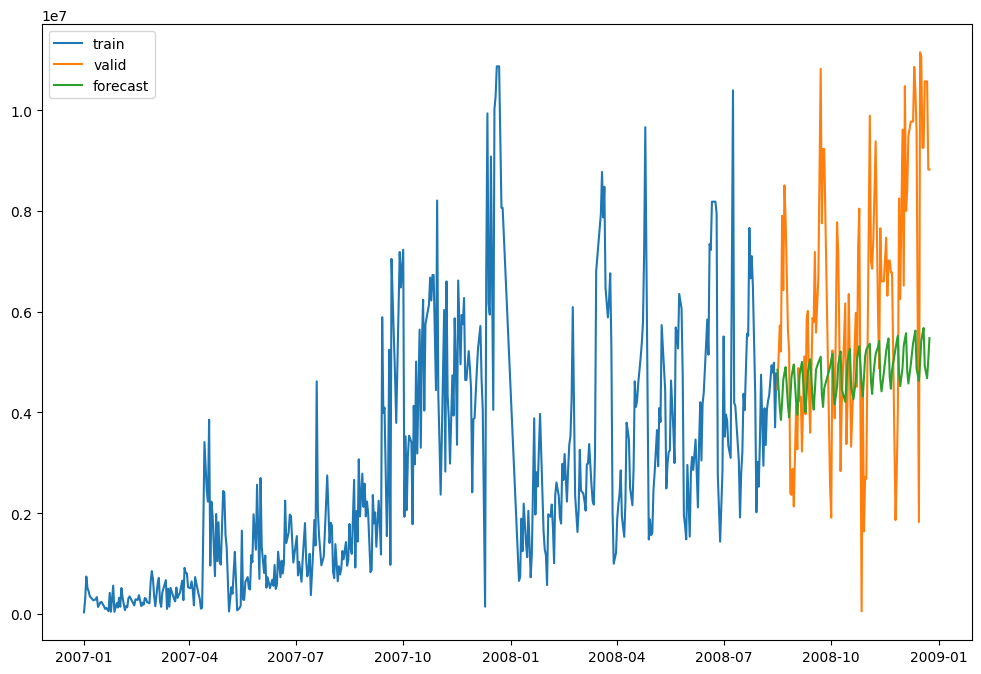

In [83]:
plt.figure(figsize = (12,8))

plt.plot(train_data.index , train_data['Number_SKU_Sold'], label = 'train')
plt.plot(valid_data.index , valid_data['Number_SKU_Sold'], label = 'valid')
plt.plot(valid_data.index , preds, label = 'forecast')
plt.legend(loc='best')

plt.show()

In [84]:
# SARIMA Model

In [85]:
### Stationarity Test

In [86]:
# dickey fuller
from statsmodels.tsa.stattools import adfuller

In [87]:
def adf_test(timeseries):
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [88]:
adf_test(data_['Number_SKU_Sold'])

Results of Dickey-Fuller Test:
Test Statistic                  -0.985668
p-value                          0.758456
#Lags Used                      19.000000
Number of Observations Used    550.000000
Critical Value (1%)             -3.442296
Critical Value (5%)             -2.866809
Critical Value (10%)            -2.569576
dtype: float64


In [89]:
''' If the test statistic is less than the critical value, we can reject the null hypothesis (aka the series is stationary). When the test statistic is greater than the critical value, we fail to reject the null hypothesis (which means the series is not stationary). **Here test statistic is > than critical. Hence series is not stationary**'''

' If the test statistic is less than the critical value, we can reject the null hypothesis (aka the series is stationary). When the test statistic is greater than the critical value, we fail to reject the null hypothesis (which means the series is not stationary). **Here test statistic is > than critical. Hence series is not stationary**'

In [90]:
### Making Series Stationary

In [91]:
def inverse_boxcox(y, lambda_):
    return np.exp(y) if lambda_ == 0 else np.exp(np.log(lambda_ * y + 1) / lambda_)

In [92]:
from scipy import stats
train_data['Number_SKU_Sold_log'], lambda_ar = stats.boxcox(train_data['Number_SKU_Sold'])
lambda_ar

0.3314282954634484

In [93]:
train_data['Number_SKU_Sold_log_diff']=train_data['Number_SKU_Sold_log']-train_data['Number_SKU_Sold_log'].shift(6)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


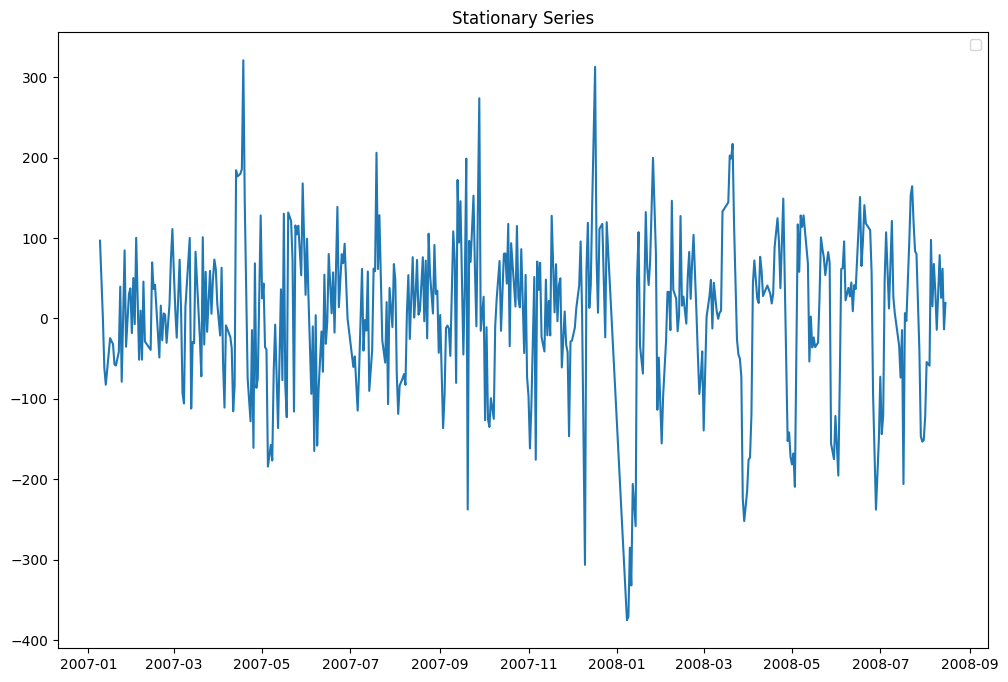

In [94]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['Number_SKU_Sold_log_diff'])
plt.legend(loc='best')
plt.title("Stationary Series")
plt.show()

In [95]:
train_data['Number_SKU_Sold_log_diff_diff']=train_data['Number_SKU_Sold_log_diff']-train_data['Number_SKU_Sold_log_diff'].shift(1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


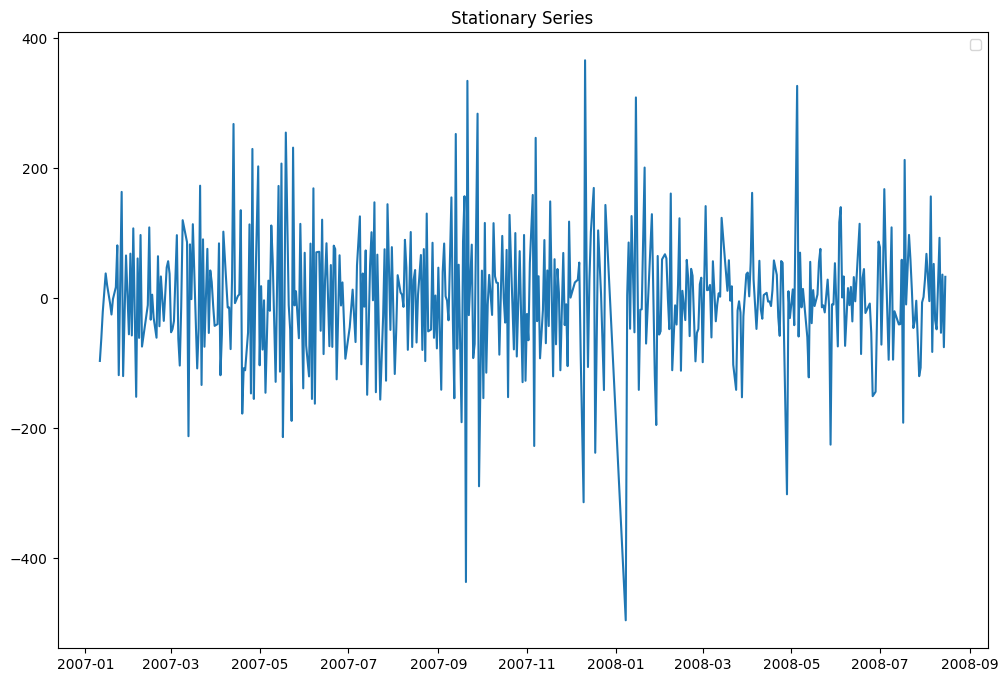

In [96]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['Number_SKU_Sold_log_diff_diff'])

plt.legend(loc='best')
plt.title("Stationary Series")
plt.show()

In [97]:
### Building Sarima Model

In [98]:
from statsmodels.tsa.statespace import sarimax
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

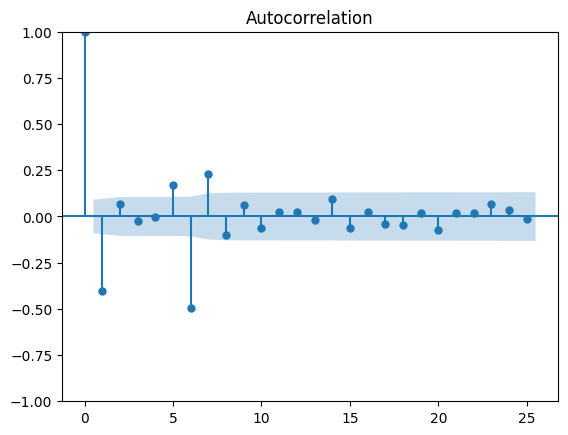

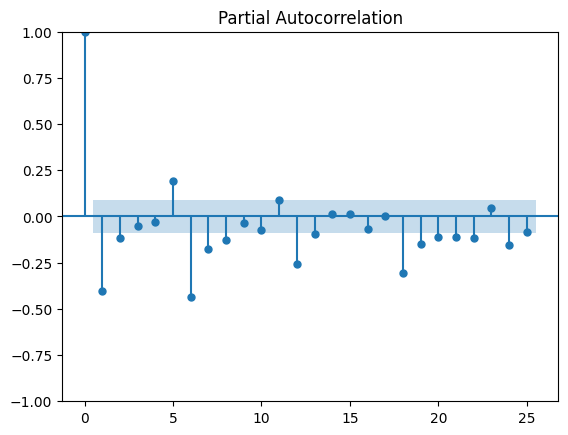

In [99]:
plot_acf(train_data['Number_SKU_Sold_log_diff_diff'].dropna(), lags=25)
plot_pacf(train_data['Number_SKU_Sold_log_diff_diff'].dropna(), lags=25)
plt.show()

In [100]:
#training the model
model = sarimax.SARIMAX(train_data['Number_SKU_Sold_log'], seasonal_order=(1,1,2,6), order=(1,1,2))
model = model.fit()

/Users/paramanandbhat/Projects/Param_learn/ML/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/paramanandbhat/Projects/Param_learn/ML/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.69944D+00    |proj g|=  2.60031D-01

At iterate    5    f=  5.62595D+00    |proj g|=  1.87293D-02


 This problem is unconstrained.



At iterate   10    f=  5.58900D+00    |proj g|=  2.44093D-02

At iterate   15    f=  5.53633D+00    |proj g|=  9.23759D-03

At iterate   20    f=  5.51061D+00    |proj g|=  1.05965D-03

At iterate   25    f=  5.50810D+00    |proj g|=  1.28386D-02

At iterate   30    f=  5.50583D+00    |proj g|=  4.92782D-04

At iterate   35    f=  5.50572D+00    |proj g|=  1.48612D-03

At iterate   40    f=  5.50501D+00    |proj g|=  3.42992D-03

At iterate   45    f=  5.50442D+00    |proj g|=  1.08084D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     48     71      1     0     0   3.313D-05   5.504D+00
  F =   5.50441581366

In [101]:
# predictions and evaluation
end = len(train_data) + len(valid_data)
preds = inverse_boxcox(model.predict(start=0, end=end)[len(train_data)+1:], lambda_ar) 
preds = (preds.reset_index())[0] # storing validation predictions

/Users/paramanandbhat/Projects/Param_learn/ML/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


KeyError: 0

In [102]:
end = len(train_data) + len(valid_data)
predicted_series = model.predict(start=0, end=end)
transformed_preds = inverse_boxcox(predicted_series[len(train_data)+1:], lambda_ar) 

# If transformed_preds is a Series:
preds = transformed_preds.reset_index(drop=True)

# If transformed_preds is a DataFrame:
# preds = transformed_preds.reset_index(drop=True)['column_name']


/Users/paramanandbhat/Projects/Param_learn/ML/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [103]:
# results
score = rmsle(valid_data['Number_SKU_Sold'], preds)
print('RMSLE for SARIMA model Forecasts is', score)

RMSLE for SARIMA model Forecasts is 64.3088587094392


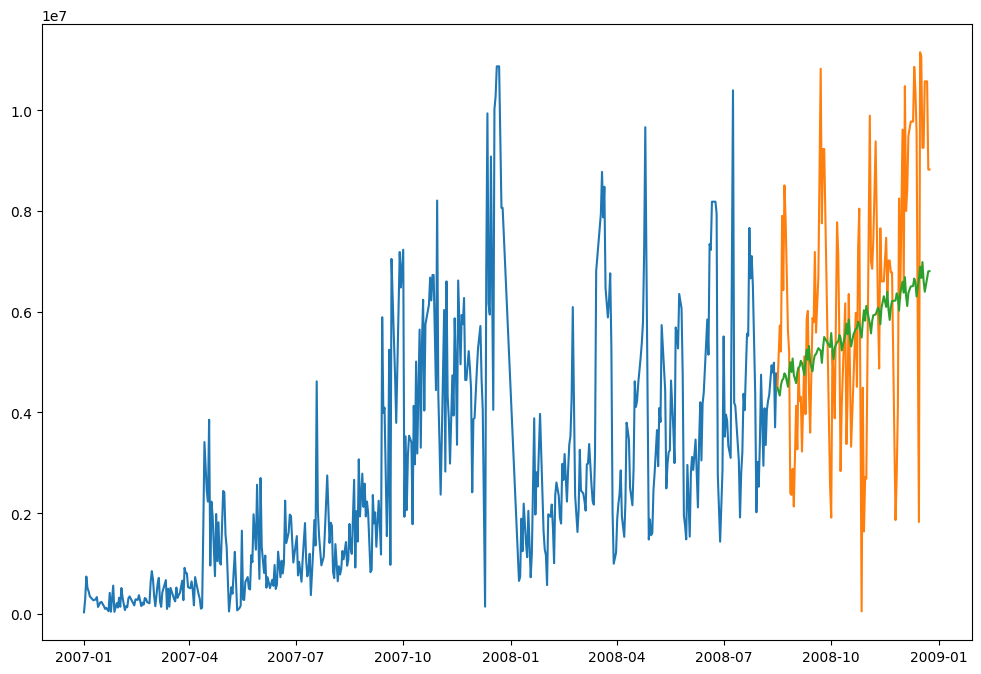

In [104]:
plt.figure(figsize = (12,8))
plt.plot(train_data.index, train_data['Number_SKU_Sold'], label = 'train')
plt.plot(valid_data.index, valid_data['Number_SKU_Sold'], label = 'valid')
plt.plot(valid_data.index, preds, label = 'preds')
plt.show()

In [105]:
# 6. Building ML Models

In [106]:
complete_data.head()

,year,month,day,weekday,weekday_name,dayofyear,week,quarter,Number_SKU_Sold
Date,,,,,,,,,
2007-01-01,2007,1,1,0,Monday,1,1,1,31762.0
2007-01-02,2007,1,2,1,Tuesday,2,1,1,285955.0
2007-01-03,2007,1,3,2,Wednesday,3,1,1,740781.0
2007-01-04,2007,1,4,3,Thursday,4,1,1,508796.0
2007-01-05,2007,1,5,4,Friday,5,1,1,445951.0


In [107]:
train_data = complete_data[:469]
valid_data = complete_data[469:]

In [108]:
valid_data.head()

,year,month,day,weekday,weekday_name,dayofyear,week,quarter,Number_SKU_Sold
Date,,,,,,,,,
2008-08-16,2008,8,16,5,Saturday,229,33,3,4458941.0
2008-08-18,2008,8,18,0,Monday,231,34,3,5724080.0
2008-08-19,2008,8,19,1,Tuesday,232,34,3,5207456.0
2008-08-20,2008,8,20,2,Wednesday,233,34,3,7901422.0
2008-08-21,2008,8,21,3,Thursday,234,34,3,6427382.0


In [109]:
### Linear Regression Model

In [110]:
from sklearn.linear_model import LinearRegression

In [114]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# separating features and target variable
x_train = train_data.drop(['Number_SKU_Sold', 'weekday_name'], axis=1)
y_train = train_data['Number_SKU_Sold']

x_valid = valid_data.drop(['Number_SKU_Sold', 'weekday_name'], axis=1)
y_valid = valid_data['Number_SKU_Sold']

# training the model with normalization
model = make_pipeline(StandardScaler(), LinearRegression())
model.fit(x_train, y_train)
preds = model.predict(x_valid)

# results
score = rmsle(y_valid, preds)

print('RMSLE for Linear Regression is', score)


RMSLE for Linear Regression is 68.27026119108824


In [115]:
feature_coeff = pd.DataFrame(zip(x_train.columns, model.coef_), columns=['Feature', 'coeff'])
feature_coeff

AttributeError: 'Pipeline' object has no attribute 'coef_'

In [116]:
# Accessing the coefficients of the LinearRegression model within the pipeline
linear_model_coef = model.named_steps['linearregression'].coef_

# Creating a DataFrame for feature coefficients
feature_coeff = pd.DataFrame(zip(x_train.columns, linear_model_coef), columns=['Feature', 'Coeff'])
feature_coeff


,Feature,Coeff
0,year,1.035549e+06
1,month,-3.010492e+07
2,day,-2.443444e+06
3,weekday,4.040224e+05
4,dayofyear,1.598913e+07
5,week,1.601423e+07
6,quarter,-4.802276e+05


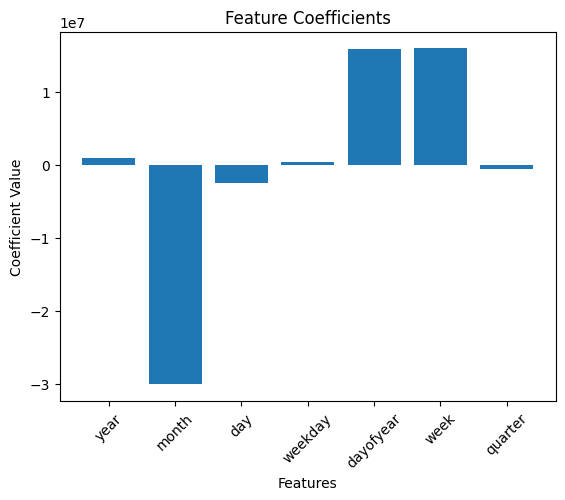

In [118]:
plt.bar(feature_coeff['Feature'], feature_coeff['Coeff'])
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45)  # Rotate feature names for better readability
plt.title('Feature Coefficients')
plt.show()


In [119]:
 # Regularization for Linear Regression

In [120]:
from sklearn.linear_model import Ridge

In [121]:
# target encoding
# month level encoding
monthly_average = pd.DataFrame(train_data.groupby('month')['Number_SKU_Sold'].mean())
train_data['monthly_average'] = train_data['month'].map(monthly_average.Number_SKU_Sold)
valid_data['monthly_average'] = valid_data['month'].map(monthly_average.Number_SKU_Sold)


# week target encoding
week_average = pd.DataFrame(train_data.groupby('weekday')['Number_SKU_Sold'].mean())
train_data['week_average'] = train_data['weekday'].map(week_average.Number_SKU_Sold)
valid_data['week_average'] = valid_data['weekday'].map(week_average.Number_SKU_Sold)

In [122]:
# separating features and target variable
x_train = train_data.drop(['Number_SKU_Sold','weekday_name'], axis=1)
y_train = train_data['Number_SKU_Sold']

x_valid = valid_data.drop(['Number_SKU_Sold', 'weekday_name'], axis=1)
y_valid = valid_data['Number_SKU_Sold']

In [124]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

for alpha in [0.01, 0.05, 0.1, 0.5, 1, 5]:
    print('----- ----- ----- ----- -----')
    print('At alpha value:', alpha)

    # Training the model with normalization
    model = make_pipeline(StandardScaler(), Ridge(alpha=alpha))
    model.fit(x_train, y_train)

    # Predictions 
    preds = model.predict(x_valid)
    score = rmsle(y_valid, preds)

    # Results
    print('Linear Regression error is', score)


----- ----- ----- ----- -----
At alpha value: 0.01
Linear Regression error is 68.84433623730129
----- ----- ----- ----- -----
At alpha value: 0.05
Linear Regression error is 68.43274396655065
----- ----- ----- ----- -----
At alpha value: 0.1
Linear Regression error is 68.33535348750357
----- ----- ----- ----- -----
At alpha value: 0.5
Linear Regression error is 68.22935973362769
----- ----- ----- ----- -----
At alpha value: 1
Linear Regression error is 68.1975298930252
----- ----- ----- ----- -----
At alpha value: 5
Linear Regression error is 68.03612672820934


In [126]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Training the model with normalization
model = make_pipeline(StandardScaler(), Ridge(alpha=0.5))
model.fit(x_train, y_train)

# Predictions 
preds = model.predict(x_valid)
score = rmsle(y_valid, preds)

# Results
print('Linear Regression error is', score)


Linear Regression error is 68.22935973362769


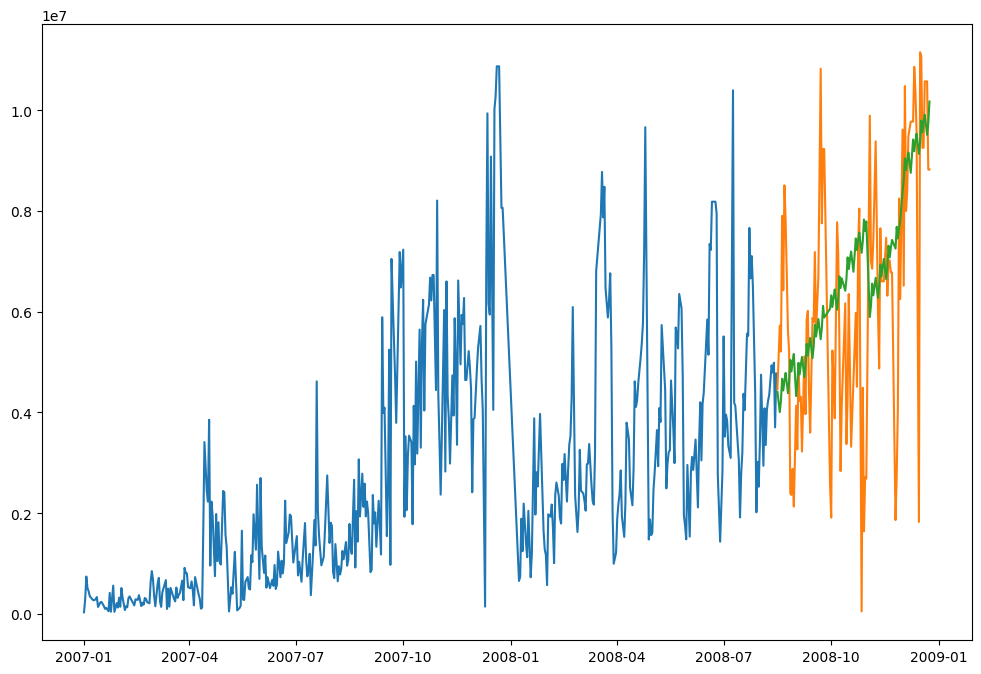

In [127]:
plt.figure(figsize=(12,8))
plt.plot(train_data.index, train_data['Number_SKU_Sold'], label = 'train')
plt.plot(valid_data.index, valid_data['Number_SKU_Sold'], label = 'valid')
plt.plot(valid_data.index, preds, label = 'preds')
plt.show()

In [129]:
# Accessing the coefficients of the Ridge model within the pipeline
ridge_model_coef = model.named_steps['ridge'].coef_

# Creating a DataFrame for feature coefficients
feature_coeff = pd.DataFrame(zip(x_train.columns, ridge_model_coef), columns=['Feature', 'Coeff'])
feature_coeff


,Feature,Coeff
0,year,1.233921e+06
1,month,-8.598593e+05
2,day,3.486659e+05
3,weekday,2.178727e+04
4,dayofyear,6.592474e+05
5,week,6.662738e+05
6,quarter,-1.439586e+05
7,monthly_average,1.384156e+06
8,week_average,1.850267e+05


<BarContainer object of 9 artists>

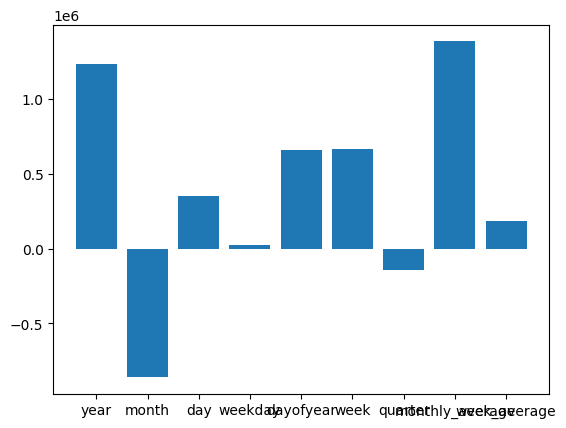

In [131]:
plt.bar(feature_coeff['Feature'], feature_coeff['Coeff'])

In [132]:
### Random Forest

In [133]:
from sklearn.ensemble import RandomForestRegressor

In [136]:
#training the model
model = RandomForestRegressor(n_estimators=100, max_depth=7, min_samples_split = 25, random_state=0)
model.fit(x_train, y_train)
    
# predictions 
preds = model.predict(x_valid)

score = rmsle(y_valid, preds)
# results
print('Average Error is',score)

Average Error is 66.12235174619704


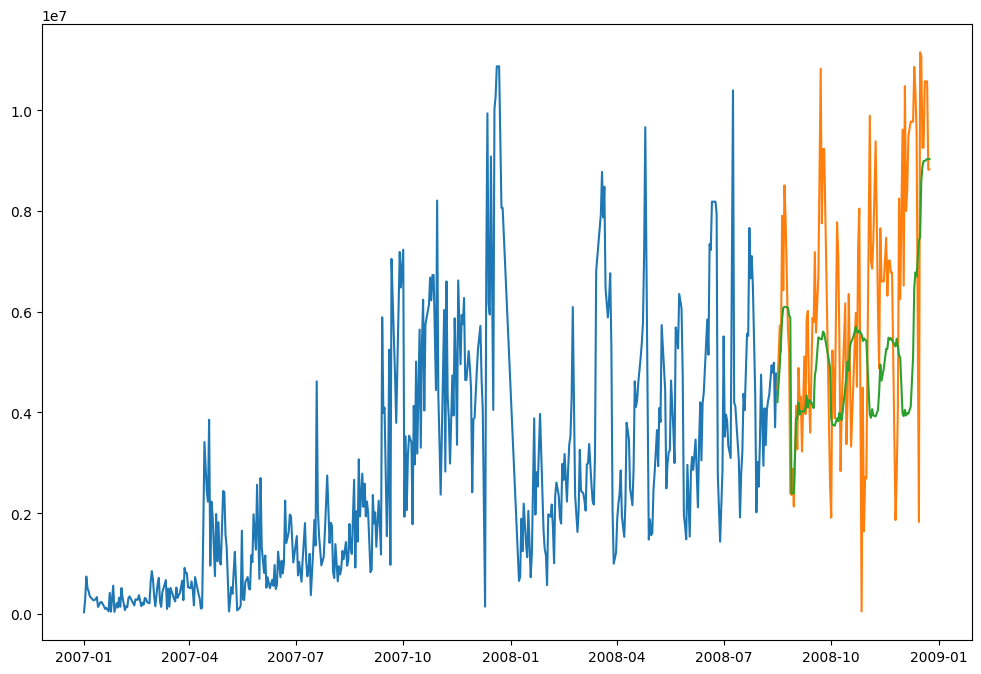

In [137]:
plt.figure(figsize = (12,8))

plt.plot(train_data.index, train_data['Number_SKU_Sold'], label = 'train')
plt.plot(valid_data.index, valid_data['Number_SKU_Sold'], label = 'valid')
plt.plot(valid_data.index, preds, label = 'preds')
plt.show()

Text(0.5, 0, 'Relative Importance')

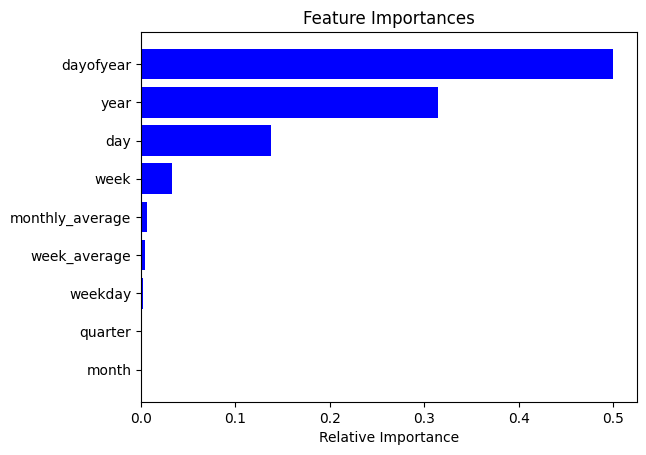

In [138]:
features = x_train.columns
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure()
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [139]:
# Hyperparameter Tuning

In [140]:
model = RandomForestRegressor(random_state=0)

In [141]:
# setting initial values and some bounds for them
n_estimator = [70, 100, 130, 150]
max_depth =  [5, 6, 7, 8, 9]
min_samples_split = [20, 30, 50]


# creating list with all the possible combinations of parameters
parameters = product(n_estimator, max_depth, min_samples_split)
parameters_list = list(parameters)
len(parameters_list)

60

In [142]:
def grid_search(parameters_list):
    
    results = []
    best_error_ = float("inf")

    for param in tqdm_notebook(parameters_list):
        
        #training the model
        model = RandomForestRegressor(n_estimators=param[0], max_depth=param[1], min_samples_split = param[2], random_state=0)
        model.fit(x_train, y_train)

        # predictions 
        preds = model.predict(x_valid)

        # predictions and evaluation
        score = rmsle(y_valid, preds)
        
        # saving best model, rmse and parameters
        if score < best_error_:
            best_model = model
            best_error_ = score
            best_param = param
        results.append([param, score])
        
    result_table = pd.DataFrame(results)
    result_table.columns = ['parameters', 'score']
    
    
    # sorting in ascending order, the lower rmse is - the better
    result_table = result_table.sort_values(by='score', ascending=True).reset_index(drop=True)
    
    return result_table

In [143]:
grid_search(parameters_list)

  0%|          | 0/60 [00:00<?, ?it/s]

,parameters,score
0,"(150, 9, 50)",63.867505
1,"(150, 8, 50)",63.867505
2,"(150, 7, 50)",63.867505
3,"(70, 9, 50)",63.884493
4,"(70, 8, 50)",63.884493
5,"(70, 7, 50)",63.884493
6,"(100, 8, 50)",63.887159
7,"(100, 7, 50)",63.887159
8,"(100, 9, 50)",63.887159
9,"(130, 7, 50)",63.899163


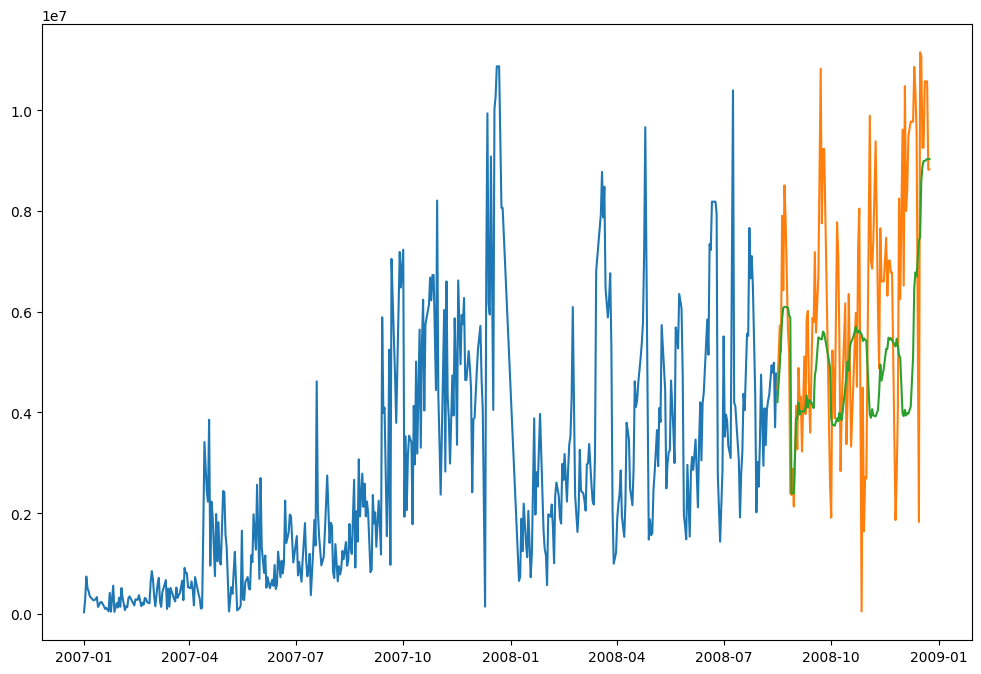

In [144]:
plt.figure(figsize = (12,8))

plt.plot(train_data.index, train_data['Number_SKU_Sold'], label = 'train')
plt.plot(valid_data.index, valid_data['Number_SKU_Sold'], label = 'valid')
plt.plot(valid_data.index, preds, label = 'preds')
plt.show()

In [145]:
# Forecast for next 6 months
test_set = pd.DataFrame(data = pd.date_range(start = '2009-01-01', end= '2009-06-30', freq = 'D'),
                        columns=['Date'])
test_set.head()

,Date
0,2009-01-01
1,2009-01-02
2,2009-01-03
3,2009-01-04
4,2009-01-05


In [147]:
test_feat = pd.DataFrame({
    "Date": test_set['Date'],
    "year": test_set['Date'].dt.year,
    "month": test_set['Date'].dt.month,
    "day": test_set['Date'].dt.day,
    "weekday": test_set['Date'].dt.dayofweek,
    "weekday_name": test_set['Date'].dt.strftime("%A"),
    "dayofyear": test_set['Date'].dt.dayofyear,
    "week": test_set['Date'].dt.isocalendar().week,
    "quarter": test_set['Date'].dt.quarter,
})


In [148]:
test_feat.head()

,Date,year,month,day,weekday,weekday_name,dayofyear,week,quarter
0,2009-01-01,2009,1,1,3,Thursday,1,1,1
1,2009-01-02,2009,1,2,4,Friday,2,1,1
2,2009-01-03,2009,1,3,5,Saturday,3,1,1
3,2009-01-04,2009,1,4,6,Sunday,4,1,1
4,2009-01-05,2009,1,5,0,Monday,5,2,1


In [149]:
complete_data.head()

,year,month,day,weekday,weekday_name,dayofyear,week,quarter,Number_SKU_Sold
Date,,,,,,,,,
2007-01-01,2007,1,1,0,Monday,1,1,1,31762.0
2007-01-02,2007,1,2,1,Tuesday,2,1,1,285955.0
2007-01-03,2007,1,3,2,Wednesday,3,1,1,740781.0
2007-01-04,2007,1,4,3,Thursday,4,1,1,508796.0
2007-01-05,2007,1,5,4,Friday,5,1,1,445951.0


In [150]:
# target encoding
# month level encoding
monthly_average = pd.DataFrame(complete_data.groupby('month')['Number_SKU_Sold'].mean())
complete_data['monthly_average'] = complete_data['month'].map(monthly_average.Number_SKU_Sold)
test_feat['monthly_average'] = test_feat['month'].map(monthly_average.Number_SKU_Sold)


# week target encoding
week_average = pd.DataFrame(complete_data.groupby('weekday')['Number_SKU_Sold'].mean())
complete_data['week_average'] = complete_data['weekday'].map(week_average.Number_SKU_Sold)
test_feat['week_average'] = test_feat['weekday'].map(week_average.Number_SKU_Sold)

In [151]:
test_feat.isnull().sum()

Date                0
year                0
month               0
day                 0
weekday             0
weekday_name        0
dayofyear           0
week                0
quarter             0
monthly_average     0
week_average       26
dtype: int64

In [152]:
test_feat.dropna(axis=0, inplace = True)

In [153]:
test_set.shape, test_feat.shape

((181, 1), (155, 11))

In [154]:
x_train = complete_data.drop(['Number_SKU_Sold', 'weekday_name'], axis=1)
y_train = complete_data['Number_SKU_Sold']

x_valid = test_feat.drop(['weekday_name', 'Date'], axis=1)

In [155]:
### Preparing Random Forest Model

In [156]:
#training the model
model = RandomForestRegressor(n_estimators=150, max_depth=9, min_samples_split = 50, random_state=0)
model.fit(x_train, y_train)
    
# predictions 
preds = model.predict(x_valid)

In [157]:
test_feat['Number_SKU_Sold'] = preds

In [158]:
test_feat.describe()

,Date,year,month,day,weekday,dayofyear,week,quarter,monthly_average,week_average,Number_SKU_Sold
count,155,155.0,155.000000,155.000000,155.000000,155.000000,155.0,155.000000,1.550000e+02,1.550000e+02,1.550000e+02
mean,2009-03-31 21:59:13.548387072,2009.0,3.503226,15.664516,2.503226,90.916129,13.916129,1.503226,2.043857e+06,3.346295e+06,3.477040e+06
min,2009-01-01 00:00:00,2009.0,1.000000,1.000000,0.000000,1.000000,1.0,1.000000,9.839137e+05,3.110939e+06,2.232777e+06
25%,2009-02-15 00:00:00,2009.0,2.000000,8.000000,1.000000,46.000000,7.5,1.000000,1.475149e+06,3.159238e+06,2.339354e+06
50%,2009-04-01 00:00:00,2009.0,4.000000,16.000000,3.000000,91.000000,14.0,2.000000,2.342267e+06,3.304147e+06,3.198271e+06
75%,2009-05-15 12:00:00,2009.0,5.000000,23.000000,4.000000,135.500000,20.0,2.000000,2.472123e+06,3.540538e+06,4.040497e+06
max,2009-06-30 00:00:00,2009.0,6.000000,31.000000,5.000000,181.000000,27.0,2.000000,2.648925e+06,3.644601e+06,6.024014e+06
std,NaN,0.0,1.722178,8.735862,1.718404,52.376008,7.491948,0.501610,6.080909e+05,1.908437e+05,1.307991e+06


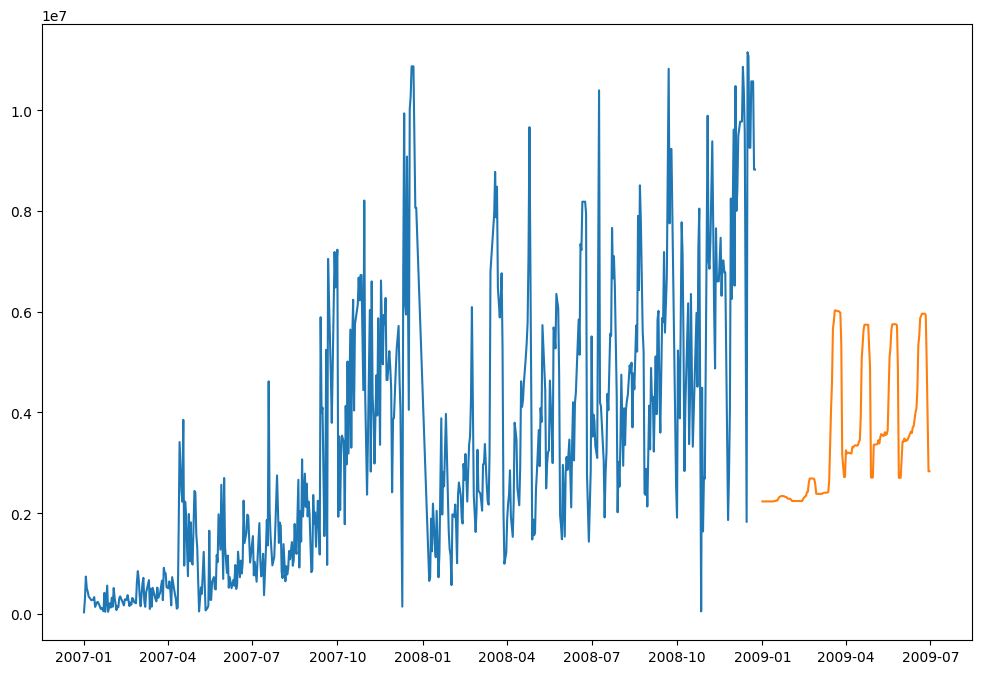

In [159]:
plt.figure(figsize = (12,8))

plt.plot(complete_data.index, complete_data['Number_SKU_Sold'], label = 'train')
plt.plot(test_feat.Date, test_feat['Number_SKU_Sold'], label = 'preds')
plt.show()

In [160]:
forecast = test_set.merge(test_feat[['Date', 'Number_SKU_Sold']], how='left', on='Date')
forecast.head()

,Date,Number_SKU_Sold
0,2009-01-01,2.232777e+06
1,2009-01-02,2.232777e+06
2,2009-01-03,2.232777e+06
3,2009-01-04,NaN
4,2009-01-05,2.232777e+06


In [161]:
### Case 1: No Sales on a weekday

In [162]:
forecast.loc[(forecast['Date'] == '2009-01-01'), ['Number_SKU_Sold']]=0

In [163]:
forecast.head()

,Date,Number_SKU_Sold
0,2009-01-01,0.000000e+00
1,2009-01-02,2.232777e+06
2,2009-01-03,2.232777e+06
3,2009-01-04,NaN
4,2009-01-05,2.232777e+06


In [164]:
### Case 2: Sale on Sunday

In [165]:
data.head()

,Date,Number_SKU_Sold
Date,,
2007-01-01,2007-01-01,31762.0
2007-01-02,2007-01-02,285955.0
2007-01-03,2007-01-03,740781.0
2007-01-04,2007-01-04,508796.0
2007-01-05,2007-01-05,445951.0


In [166]:
data.shape

(587, 2)

In [167]:
data['Day'] = data['Date'].dt.strftime("%A")
data['month'] = data['Date'].dt.month

In [168]:
data.loc[data['Day'] == 'Sunday']

,Date,Number_SKU_Sold,Day,month
Date,,,,
2007-04-01,2007-04-01,59626.0,Sunday,4
2007-04-29,2007-04-29,825969.0,Sunday,4
2007-06-24,2007-06-24,632865.0,Sunday,6
2007-08-26,2007-08-26,917286.0,Sunday,8
2007-09-23,2007-09-23,2925303.0,Sunday,9
2007-12-02,2007-12-02,2491520.0,Sunday,12
2007-12-09,2007-12-09,5208565.0,Sunday,12
2007-12-16,2007-12-16,7648492.0,Sunday,12
2007-12-23,2007-12-23,10870951.0,Sunday,12


In [169]:
'''1. Replace as sales observed the same month last year
2. Percentage change in sales (compared to Saturday)'''

'1. Replace as sales observed the same month last year\n2. Percentage change in sales (compared to Saturday)'

In [170]:
data.loc[(data['Date'] == '2007-06-24') | (data['Date'] == '2007-06-23')]

,Date,Number_SKU_Sold,Day,month
Date,,,,
2007-06-23,2007-06-23,1407460.0,Saturday,6
2007-06-24,2007-06-24,632865.0,Sunday,6


In [171]:
temp = data.loc[(data['Date'] == '2007-06-24') | (data['Date'] == '2007-06-23')]['Number_SKU_Sold']
temp.pct_change() 

Date
2007-06-23        NaN
2007-06-24   -0.55035
Name: Number_SKU_Sold, dtype: float64

In [172]:
test_feat['month'].value_counts()

month
1    27
3    26
4    26
5    26
6    26
2    24
Name: count, dtype: int64

In [173]:
test_feat[['Date', 'weekday', 'month', 'Number_SKU_Sold']].loc[(test_feat['weekday'] == 5) &(test_feat['month']== 6)]

,Date,weekday,month,Number_SKU_Sold
156,2009-06-06,5,6,3.444443e+06
163,2009-06-13,5,6,3.727746e+06
170,2009-06-20,5,6,5.870244e+06
177,2009-06-27,5,6,5.021730e+06


In [174]:
def sunday(value, pct_ch):
    val = (value*pct_ch)+value
    return val

In [175]:
sunday(3512171, -0.55)

1580476.95